In [32]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

In [33]:
data=pd.read_csv("Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [34]:
#notes

# SLR   y=b0+b1x1

# MLR   y=b0+b1x1+b2x2+---------bnxn

# PLR   y=b0+b1x1+ b2x1^2 +-------------------bnx1^n


# we have three column ,position is not required bexse we have level column 
# so only level column and salary column is use

# so first we deide into dependent variable and indipendent variable



In [35]:
real_x=data.iloc[:,1:2].values # it means only one colunm that genereate matrix
real_y=data.iloc[:,2].values

In [36]:
linear_reg=LinearRegression()# here we are use simple linear regression bxse at the end we will compare 

In [37]:
linear_reg.fit(real_x,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
poly_reg=PolynomialFeatures(degree=4) #y=b0+b1x1+b2x1^2   i changed from 2 to 4

In [39]:
real_x_poly=poly_reg.fit_transform(real_x)# here we transform linear regression  indipendent variable value into poly indipident
                                                                                                                    #variable
real_x_poly
# real_y will remain same

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [40]:
# here we will apply polynomial regression
poly_reg.fit(real_x_poly,real_y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [41]:
# here we create new polynomial indipendent variable linear regression model
linear_reg2=LinearRegression()
linear_reg2.fit(real_x_poly,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
#91 here we will plot and predict

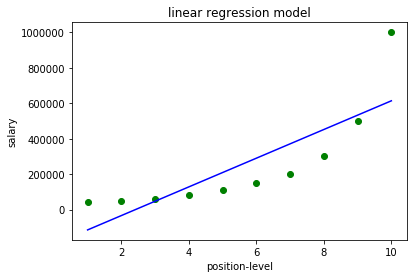

In [43]:
plt.scatter(real_x,real_y,color='green')
plt.plot(real_x,linear_reg.predict(real_x),color='blue')
plt.title("linear regression model")
plt.xlabel("position-level")
plt.ylabel("salary")
plt.show()

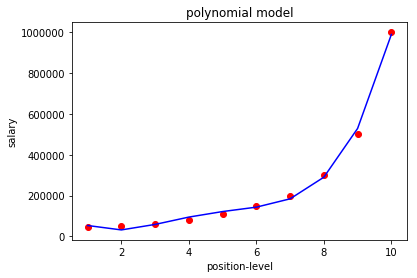

In [44]:
plt.scatter(real_x,real_y,color='red')
plt.plot(real_x,linear_reg2.predict(real_x_poly),color='blue')
plt.title("polynomial model")
plt.xlabel("position-level")
plt.ylabel("salary")
plt.show()

In [45]:
# if i change the degree of degree =2 to degree=4 then it will give accurate value check above


# below we will predict


In [46]:
linear_reg.predict(6.5)

array([330378.78787879])

In [48]:
linear_reg2.predict(poly_reg.fit_transform(6.5))

array([158862.45265153])